# SVM for classifying income and age data in a population

In [24]:
import numpy as np

def createScatter(N,k):
    PointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range(k):
        incomeCenter = np.random.uniform(20000.0, 200000.0)
        ageCenter = np.random.uniform(20.0, 70.0)
        for j in range(int(PointsPerCluster)):
            X.append([np.random.normal(incomeCenter,15000.0), np.random.normal(ageCenter, 2.0)])
            y.append(i)
    
    X = np.array(X)
    y = np.array(y)
    
    return X,y
                                        

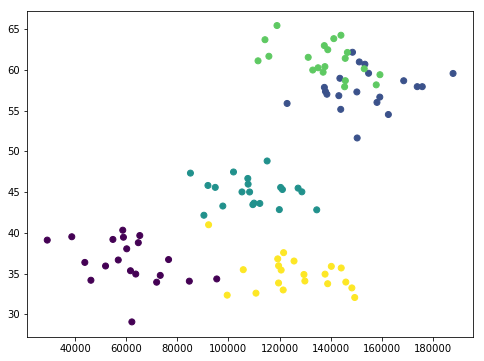

In [25]:
%matplotlib inline
from pylab import*

(X,y) = createScatter(100,5)

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y.astype(np.float))
plt.show()

In [26]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel = 'linear', C=C).fit(X,y)

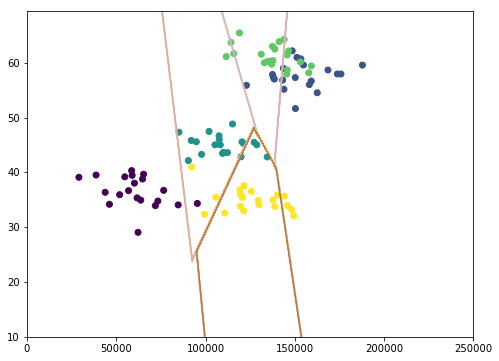

In [27]:
def classifyPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0,250000,10),
                         np.arange(10,70,0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    plt.figure(figsize = (8,6))
    z = Z.reshape(xx.shape)
    plt.contour(xx, yy , z , cmap = plt.cm.Paired, alpha = 0.8)
    plt.scatter(X[:,0], X[:,1], c = y.astype(np.float))
    plt.show()
    
classifyPredictions(svc)

In [28]:
print(svc.predict([[200000,40]]))

[1]


In [29]:
print(svc.predict([[56000,65]]))

[0]
